In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 


# Data Wrangling

My goal in this section is to make sure that I have either remedied all null values, or made sure that if they are there then there is an adequate reason for keeping them there. I also want to make sure that all of the features are in the correct data type. 

In [2]:
apps = pd.read_csv('googleplaystore.csv')

In [3]:
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

To start off, there are a few missing values in "content rating", "Type","Current Vers" and "Andrior Ver", and over 1,000 missing values in "rating", so we will have to figure out what to do with these. 

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps.loc[apps['Type'].isnull()] #0 reviews and 0 installs. I'll just drop this one

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [7]:
apps.loc[apps['Content Rating'].isnull()] #Input error. Person missed category and everything shifted. only 1,000+ installs. 
                                            #I'll just drop

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
apps.dropna(subset = ['Type','Content Rating'], inplace = True)

In [9]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
App               10839 non-null object
Category          10839 non-null object
Rating            9366 non-null float64
Reviews           10839 non-null object
Size              10839 non-null object
Installs          10839 non-null object
Type              10839 non-null object
Price             10839 non-null object
Content Rating    10839 non-null object
Genres            10839 non-null object
Last Updated      10839 non-null object
Current Ver       10831 non-null object
Android Ver       10837 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [10]:
apps['Installs'] = apps['Installs'].map(lambda x: x.strip('+'))
apps['Installs'] = apps['Installs'].map(lambda x: x.replace(',','')).astype(int)


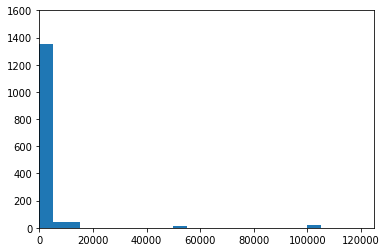

In [11]:
#It seems like most of the apps without ratings do not have very many installs either. So I will drop these.
_ = plt.hist(apps.loc[apps['Rating'].isnull()]['Installs'], bins = 200)
_ = plt.axis([0,125000,0,1600])

In [12]:
#The highest amount that has no ratings has 1 million installs
np.max(apps.loc[apps['Rating'].isnull()]['Installs'])

1000000

In [13]:
len(apps.loc[apps['Rating'].isnull()].loc[apps['Installs'] == 1000000]) #Theres only 2 of them with a million downloads

2

In [14]:
len(apps.loc[apps['Installs'] == 1000000]) #But there are over 1,500 apps with over 1 million installs, so I'll just drop all 
                                            #of the apps without ratings

1579

In [15]:
apps.dropna(subset = ['Rating'], inplace = True)

In [16]:
apps.info() #A few last things. Reviews, price and Size should be an integer while last updated should be a datetime.
            #Also, Current and Andriod Ver still have a few null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null int32
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9362 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 987.8+ KB


In [17]:
apps.loc[apps['Current Ver'].isnull()] #I think I'll just drop these as well

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [18]:
apps.dropna(subset = ['Current Ver'], inplace = True)

In [19]:
apps.loc[apps['Android Ver'].isnull()] #I think I'll just drop these as well

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [20]:
apps.dropna(subset = ['Android Ver'], inplace = True)

In [21]:
apps['Reviews'] = apps['Reviews'].astype(int)

In [22]:
apps.info() #All non-null. Happy table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null object
Installs          9360 non-null int32
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 950.6+ KB


In [23]:
size_varies = apps.loc[apps['Size'] == 'Varies with device']

In [24]:
#There's actually kind of a lot of apps that have size of "varies with device"
len(size_varies)

1637

In [25]:
sum(size_varies['Installs'] > 1000000) #They're also downloaded a lot. Most of them have over 1 million installs

1084

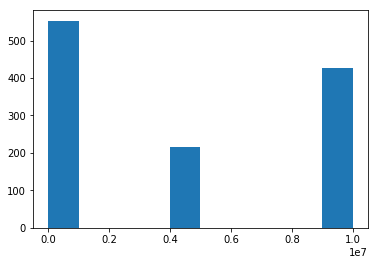

In [26]:
#Most of these apps have over 10 million downloads, so I cannot just drop these. 
_ = plt.hist(size_varies['Installs'].loc[size_varies['Installs'] <20000000])


In [27]:
#There's actually 58 apps with at least 1 billion downloads, which is the max amount (right now)
#And almost every single one has "varies with device as it's size"
len(apps.loc[apps['Installs'] == np.max(apps['Installs'])])

58

In [28]:
#Replacing these values with nan. We will get back to these later. 
apps['Size'] = apps['Size'].map(lambda x: x.strip('M'))
apps['Size'] = apps['Size'].replace(r'^[A-Za-z\s]+', np.nan, regex = True)


In [29]:
apps['Size'] = apps['Size'].astype(str)

In [30]:
megas = []
for i in apps['Size']:
    if i[-1].isdigit():
        megas.append(i)
    elif i.endswith('k'):
        k = float(i.strip('k'))/(1000)
        megas.append(k)
    else:
        megas.append(np.nan)
len(megas)

9360

In [31]:
#I have converted the Size column to either null or MegaBytes
len(apps['Size'])

9360

In [32]:
apps['Size'] = pd.DataFrame(megas).astype(float)

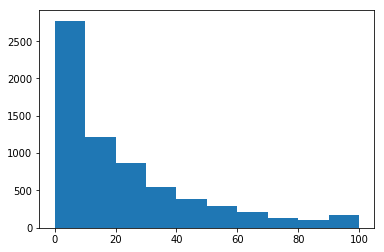

In [33]:
#Very lopsided distribution of sizes. Will Replace with Median
_ = plt.hist(apps['Size'].dropna())

In [34]:
apps['Size'].fillna(np.median(apps['Size'].dropna()), inplace = True)

In [35]:
apps['Price'] = apps['Price'].map(lambda x: x.strip('$'))
apps['Price'] = apps['Price'].astype(float)

In [36]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int32
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 950.6+ KB


In [37]:
#Now to convert the rest of these as categories
apps['Type'] = apps['Type'].astype('category')
apps['Content Rating'] = apps['Content Rating'].astype('category')
apps['Genres'] = apps['Genres'].astype('category')

In [38]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int32
Type              9360 non-null category
Price             9360 non-null float64
Content Rating    9360 non-null category
Genres            9360 non-null category
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: category(3), float64(3), int32(2), object(5)
memory usage: 764.9+ KB


In [39]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

In [40]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int32
Type              9360 non-null category
Price             9360 non-null float64
Content Rating    9360 non-null category
Genres            9360 non-null category
Last Updated      9360 non-null datetime64[ns]
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: category(3), datetime64[ns](1), float64(3), int32(2), object(4)
memory usage: 764.9+ KB


In [41]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [42]:
#Unfortunately, there are quite a few apps that have been duplicated. 
sum(apps.duplicated('App'))

1170

In [43]:
#Because some apps just might just so happen have the same name, I will check to see if the app and the amount of ratings are
#the same. And then I will drop the duplicates. I chose rating because it would be very hard to get the same value on a 
#continuous variable like that
sum(apps.duplicated(['App','Rating']))

1153

In [44]:
apps.drop_duplicates(['App','Rating'], inplace = True)

I think I have everything cleaned up for this first dataset

In [45]:
apps.info() #Dropped around 500. Looks Correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8207 entries, 0 to 10840
Data columns (total 13 columns):
App               8207 non-null object
Category          8207 non-null object
Rating            8207 non-null float64
Reviews           8207 non-null int32
Size              8207 non-null float64
Installs          8207 non-null int32
Type              8207 non-null category
Price             8207 non-null float64
Content Rating    8207 non-null category
Genres            8207 non-null category
Last Updated      8207 non-null datetime64[ns]
Current Ver       8207 non-null object
Android Ver       8207 non-null object
dtypes: category(3), datetime64[ns](1), float64(3), int32(2), object(4)
memory usage: 671.4+ KB


In [120]:
apps.to_csv('apps.csv')

In [121]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [122]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Many of these do not have complete data, and by the fact that there are 37432 in each of the last 3 columns, I would assume that if the row does not have one, it does not have the rest

In [123]:
#As you can see, the null values seem to come together
reviews.loc[reviews['Sentiment'].isnull()].head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
115,10 Best Foods for You,NaN,NaN,NaN,NaN
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
368,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
407,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN


In [124]:
reviews.dropna(subset = ['Sentiment'], inplace = True)

In [125]:
#I lost about 23,000 rows, but I don't think there was any way around that
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
App                       37432 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [126]:
#There's also no useful information I might be able to extract from the null "translated review" column
reviews.loc[reviews['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [127]:
reviews.dropna(subset = ['Translated_Review'], inplace = True)

In [128]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [129]:
reviews.to_csv('reviews.csv')

In [130]:
reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


I think the column names are all self-explanatory, so I will not bother with making a table for what they mean.